In [4]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageOps
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal, uniform
from pymongo import MongoClient
from bson import ObjectId
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

%matplotlib notebook

client = MongoClient('localhost:27017')
db = client.Teenie



In [5]:
x = []
y = []
z = []
for post in db.Faces.find():
    if u'headPose_roll' in post.keys() and u'headPose_yaw' in post.keys() and u'headPose_pitch' in post.keys():
        x.append(post[u'headPose_roll'])
        z.append(post[u'headPose_yaw'])
        y.append(post[u'headPose_pitch'])

<IPython.core.display.Javascript object>


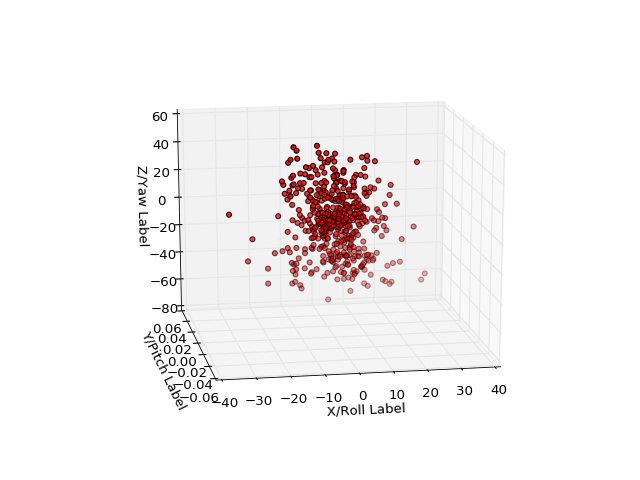

In [10]:
new_x = []
new_y = []
new_z = []
indicies = np.random.randint(len(x), size=500)
for i in indicies:
    new_x.append(x[i])
    new_y.append(y[i])
    new_z.append(z[i])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_x, new_y,new_z, c='r', marker='o')

ax.set_xlabel('X/Roll Label')
ax.set_ylabel('Y/Pitch Label')
ax.set_zlabel('Z/Yaw Label')

plt.show()

#  x axis from your left shouder to right. z axis is going straightthrough your spine to the top of your head. 
#y axis is when you tilt your hear forward and backward likw you're nodding off to  sleep

# Why is y always zero?

In [ ]:


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, rstride=8, cstride=8, alpha=0.3)
X, Y = np.meshgrid(x,y)
# cset = ax.contour(X,Y,z, zdir='z', cmap=cm.coolwarm)
# cset = ax.contour(X,Y,z, zdir='x', cmap=cm.coolwarm)
# cset = ax.contour(X,Y,z, zdir='y', cmap=cm.coolwarm)

# ax.set_xlabel('X/Roll Label')
# # ax.set_xlim(-40, 40)
# ax.set_ylabel('Y/Pitch Label')
# # ax.set_ylim(-40, 40)
# ax.set_zlabel('Z/Yaw Label')
# # ax.set_zlim(-100, 100)

plt.show()

In [ ]:
3